In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-college-statistics-dataset/College Data.csv


In [2]:
 df = pd.read_csv("/kaggle/input/global-college-statistics-dataset/College Data.csv")

In [3]:
df



,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,College 93,India,14676,10771,3905,8.335598,3151197,Civil Engineering,Cricket,20,65.61,596
49996,College 48,Japan,21908,10682,6820,8.490003,3060006,Physics,Chess,9,99.15,383
49997,College 67,South Africa,17263,11035,6228,5.979781,1519563,Chemical Engineering,Athletics,35,78.28,671
49998,College 54,USA,11371,10233,1138,7.714894,2429788,Mechanical Engineering,Swimming,11,88.46,164


In [4]:
df.columns

Index(['College ID', 'Country', 'Total Students', 'Male', 'Female', 'CGPA',
       'Annual Family Income', 'Branch', 'Sports', 'Research Papers Published',
       'Placement Rate', 'Faculty Count'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   College ID                 50000 non-null  object 
 1   Country                    50000 non-null  object 
 2   Total Students             50000 non-null  int64  
 3   Male                       50000 non-null  int64  
 4   Female                     50000 non-null  int64  
 5   CGPA                       50000 non-null  float64
 6   Annual Family Income       50000 non-null  int64  
 7   Branch                     50000 non-null  object 
 8   Sports                     50000 non-null  object 
 9   Research Papers Published  50000 non-null  int64  
 10  Placement Rate             50000 non-null  float64
 11  Faculty Count              50000 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 4.6+ MB


make a new column of male+female

In [6]:
df['gender_straigt']=df['Male']+df['Female']
df.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655,14237
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256,11913
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555,9863
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455,13239
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310,10236


Add a gpa category column and divide collegers according to them


In [7]:
def categorize_gpa(gpa):
    if gpa >= 8.5:
        return 'Excellent'
    elif 7 <= gpa < 8.5:
        return 'Good'
    elif 5.5 <= gpa < 7:
        return 'Average'
    else:
        return 'Needs Improvement'



df['CGPA_Category'] = df['CGPA'].apply(categorize_gpa)

Data cleaning : handling missing values



In [8]:
df.isnull().sum()
# no value in the dataset is empty



College ID                   0
Country                      0
Total Students               0
Male                         0
Female                       0
CGPA                         0
Annual Family Income         0
Branch                       0
Sports                       0
Research Papers Published    0
Placement Rate               0
Faculty Count                0
gender_straigt               0
CGPA_Category                0
dtype: int64

In [9]:
# applying a gpa collumn
df.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt,CGPA_Category
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655,14237,Excellent
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256,11913,Average
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555,9863,Excellent
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455,13239,Excellent
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310,10236,Excellent


In [10]:
# counting the collegs with Excellent cgpa
df_exlt = df[df.CGPA_Category =='Excellent'].head()

In [11]:
df_exlt.reset_index()

,index,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt,CGPA_Category
0,0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655,14237,Excellent
1,2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555,9863,Excellent
2,3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455,13239,Excellent
3,4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310,10236,Excellent
4,5,College 21,USA,22804,4373,2757,9.112827,1885655,Chemical Engineering,Basketball,30,85.50,439,7130,Excellent


In [12]:
# clg with excellent gpa in usa
df_exlt[df_exlt.Country=='USA']
#one on clg in usa with excellent gpa

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt,CGPA_Category
5,College 21,USA,22804,4373,2757,9.112827,1885655,Chemical Engineering,Basketball,30,85.5,439,7130,Excellent


In [13]:
# describe on the basis of cgpa
df['CGPA'].describe()

count    50000.000000
mean         8.705289
std          1.053363
min          4.001559
25%          7.980137
50%          8.806043
75%          9.652321
max         10.000000
Name: CGPA, dtype: float64

In [14]:
# different no of braches 
df['Branch'].value_counts()

Branch
Chemical Engineering       5132
Physics                    5109
Mathematics                5068
Electrical Engineering     5018
Computer Science           5008
Civil Engineering          4998
Biotechnology              4980
Business Administration    4956
Mechanical Engineering     4924
Economics                  4807
Name: count, dtype: int64

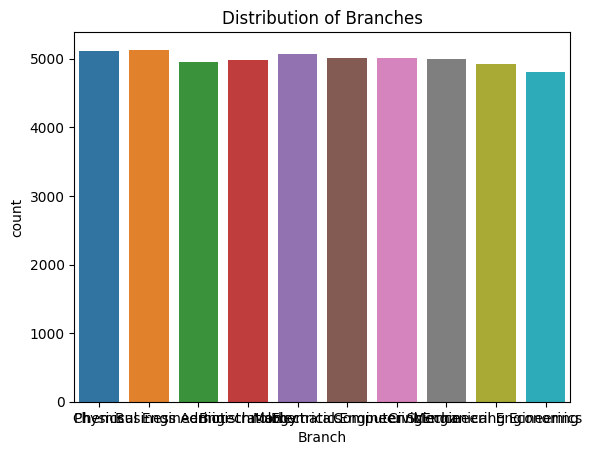

In [15]:
#plotting the brances in the count plot
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df, x='Branch')
plt.title('Distribution of Branches')
plt.show()

In [16]:
branch_name = df["Branch"].value_counts().index
branch_name

Index(['Chemical Engineering', 'Physics', 'Mathematics',
       'Electrical Engineering', 'Computer Science', 'Civil Engineering',
       'Biotechnology', 'Business Administration', 'Mechanical Engineering',
       'Economics'],
      dtype='object', name='Branch')

In [17]:
branch_val = df["Branch"].value_counts().values
branch_val

array([5132, 5109, 5068, 5018, 5008, 4998, 4980, 4956, 4924, 4807])

([<matplotlib.patches.Wedge at 0x79f8ceef0130>,
 [Text(0.5443210764538311, 0.9558841800804859, 'Chemical Engineering'),
  Text(-1.0999051312549206, -0.014446530348011643, 'Physics'),
  Text(0.5568279589622611, -0.9486530578235242, 'Mathematics')],
 [Text(0.2969024053384533, 0.5213913709529923, '33.52%'),
  Text(-0.5999482534117748, -0.007879925644369986, '33.37%'),
  Text(0.3037243412521424, -0.5174471224491949, '33.10%')])

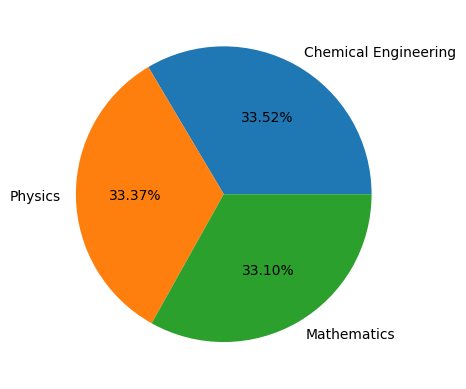

In [18]:
# plotting a pie chart of the top 3 branches
plt.pie(branch_val[:3],labels = branch_name[:3],autopct='%1.2f%%')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


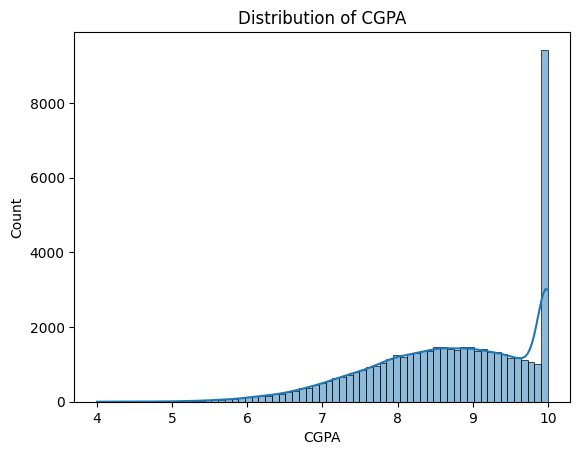

In [19]:
# plotting a histplot of distibution of cgpa
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of CGPA')
plt.show()

In [20]:
df.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt,CGPA_Category
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655,14237,Excellent
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256,11913,Average
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555,9863,Excellent
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455,13239,Excellent
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310,10236,Excellent


In [21]:
#differentiating clgs on the basis of placement percentage
def categorize_plt(plt):
    if plt >= 85:
        return 'A++'
    elif 70 <= plt < 85:
        return 'A'
    elif 55 <= plt < 70:
        return 'B'
    else:
        return 'Needs Improvement'



df['College Score'] = df['Placement Rate'].apply(categorize_plt)


In [22]:
df.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt,CGPA_Category,College Score
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655,14237,Excellent,A++
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256,11913,Average,B
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555,9863,Excellent,A++
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455,13239,Excellent,A++
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310,10236,Excellent,A


In [23]:
df['Gender Ratio'] = df['Male'] / df['Female']
df['Student Faculty Ratio'] = df['Total Students'] / df['Faculty Count']

In [24]:
df.head()

,College ID,Country,Total Students,Male,Female,CGPA,Annual Family Income,Branch,Sports,Research Papers Published,Placement Rate,Faculty Count,gender_straigt,CGPA_Category,College Score,Gender Ratio,Student Faculty Ratio
0,College 52,UK,27002,2593,11644,10.000000,3574250,Physics,Swimming,39,100.00,655,14237,Excellent,A++,0.222690,41.224427
1,College 93,Switzerland,11913,9392,2521,6.951278,762556,Chemical Engineering,Athletics,31,68.84,256,11913,Average,B,3.725506,46.535156
2,College 15,Japan,15644,5475,4388,9.327922,1795845,Business Administration,Volleyball,37,91.99,555,9863,Excellent,A++,1.247721,28.187387
3,College 72,Singapore,13239,7363,5876,8.681112,1222223,Physics,Tennis,48,97.98,455,13239,Excellent,A++,1.253063,29.096703
4,College 61,Canada,10236,13339,-3103,8.560567,1921133,Biotechnology,Athletics,34,83.56,310,10236,Excellent,A,-4.298743,33.019355


([<matplotlib.patches.Wedge at 0x79f8cf441690>,
 [Text(-0.3422909983653196, 1.0453883835388993, 'Excellent'),
  Text(0.11833549096049645, -1.0936163456985901, 'Good'),
  Text(1.0761445215626804, -0.22784417638076623, 'Average')],
 [Text(-0.18670418092653795, 0.5702118455666723, '60.07%'),
  Text(0.06454663143299805, -0.5965180067446855, '33.29%'),
  Text(0.5869879208523711, -0.12427864166223611, '6.64%')])

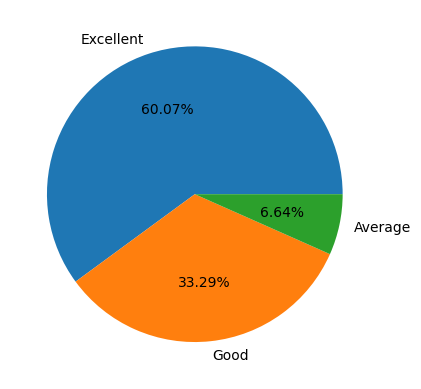

In [26]:
#plotting CGPA catagorty in a pie chart
x= df["CGPA_Category"].value_counts().index
y= df["CGPA_Category"].value_counts().values
plt.pie(y[:3],labels = x[:3],autopct='%1.2f%%')


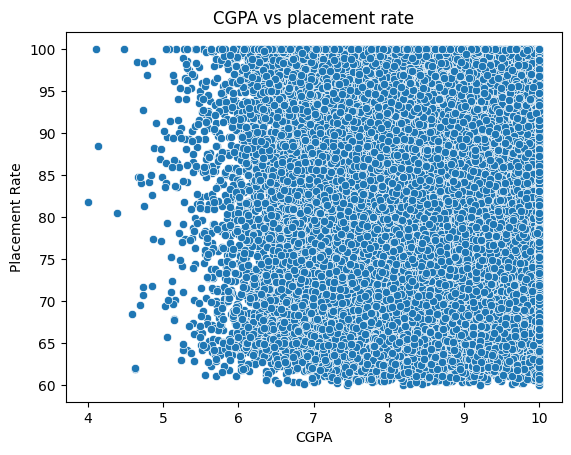

In [32]:
# cgpa VS placement rate
sns.scatterplot(data=df, x='CGPA', y='Placement Rate')
plt.title("CGPA vs placement rate")
plt.show()

In [29]:
# cgpa by country and branch
grouped = df.groupby(["Country","Branch"])["CGPA"].mean().reset_index()
print(grouped)

      Country                   Branch      CGPA
0   Australia            Biotechnology  8.673088
1   Australia  Business Administration  8.624114
2   Australia     Chemical Engineering  8.700649
3   Australia        Civil Engineering  8.770923
4   Australia         Computer Science  8.714138
..        ...                      ...       ...
95        USA                Economics  8.727516
96        USA   Electrical Engineering  8.665487
97        USA              Mathematics  8.721811
98        USA   Mechanical Engineering  8.775985
99        USA                  Physics  8.644998

[100 rows x 3 columns]


([<matplotlib.patches.Wedge at 0x79f8cf3a5ae0>,
 [Text(0.22042591398747202, 1.0776884598263023, 'A++'),
  Text(-0.7843387038365652, -0.7712410762297202, 'A'),
  Text(0.9127692287763466, -0.6138829978090562, 'B')],
 [Text(0.12023231672043927, 0.5878300689961649, '43.58%'),
  Text(-0.42782111118358096, -0.4206769506707564, '37.58%'),
  Text(0.497874124787098, -0.33484527153221244, '18.85%')])

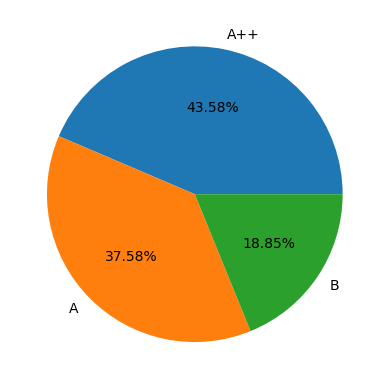

In [34]:
#plotting College score in a pie chart
x= df["College Score"].value_counts().index
y= df["College Score"].value_counts().values
plt.pie(y,labels = x,autopct='%1.2f%%')

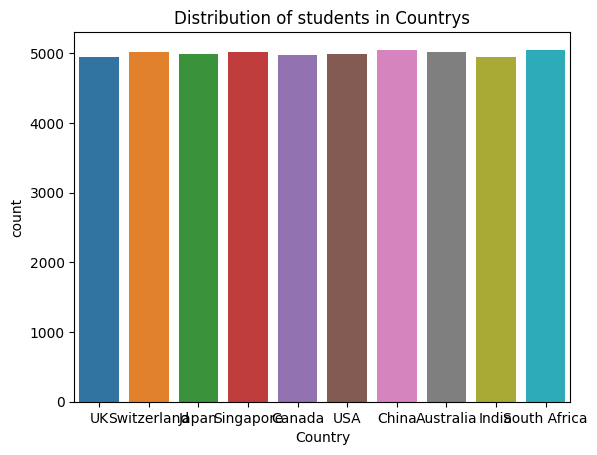

In [38]:
sns.countplot(data=df, x='Country')
plt.title('Distribution of students in Countrys')
plt.show()